In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import time
from scipy.fft import fft, ifft
from scipy import interpolate

In [18]:


#added the files stored locally to the collab
mindwave_file = '/content/MW.txt'
muse_file = '/content/MU.txt'

#function to load the data from a file
#mentioned that \t was the seperator so spliting the data to sort into columns in dataframe subsequently
def load_data(file_path):
    data= []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.split('\t')
            data.append(line)
    return data

# Load data from the files
mindwave_data = load_data(mindwave_file)
muse_data = load_data(muse_file)

#create dataframes
mindwave_df = pd.DataFrame(mindwave_data, columns=['id', 'event_id', 'device', 'channel', 'code', 'size', 'data'])
muse_df=pd.DataFrame(muse_data,columns=['id', 'event_id', 'device', 'channel', 'code', 'size', 'data'])

#getting FP1 and FP2 channels from muse
FP1_df =muse_df[muse_df['channel']=='FP1']
FP1_df.columns = ['id', 'event_id', 'device', 'channel', 'code', 'size', 'data']
FP2_df =muse_df[muse_df['channel']=='FP2']
FP1_df.columns = ['id', 'event_id', 'device', 'channel', 'code', 'size', 'data']

#new muse dataframe with FP1 and FP2
muse_new_df = pd.concat([FP1_df, FP2_df]).reset_index(drop=True)

print(mindwave_df)

print(muse_new_df)


          id event_id device channel code  size  \
0          0        0     MW     FP1    0  1017   
1          1        1     MW     FP1    1   889   
2          2        2     MW     FP1    4  1017   
3          3        3     MW     FP1    1  1017   
4          4        4     MW     FP1    8   952   
...      ...      ...    ...     ...  ...   ...   
51176  51176    51176     MW     FP1    9   889   
51177  51177    51177     MW     FP1    9   952   
51178  51178    51178     MW     FP1    9  1015   
51179  51179    51179     MW     FP1    8   952   
51180  51180    51180     MW     FP1    5  1015   

                                                    data  
0      38,48,51,44,48,56,56,41,20,-3,-9,-1,6,5,6,17,2...  
1      83,74,65,65,66,55,43,25,18,20,26,33,41,38,28,3...  
2      19,10,-2,-9,-5,3,8,7,8,2,-10,-21,-22,-27,-30,-...  
3      17,29,36,26,21,17,17,13,17,21,25,26,20,5,-5,-1...  
4      77,74,69,70,76,75,76,75,67,66,76,93,98,82,55,3...  
...                              

In [23]:
# Combining the MindWave and Muse DataFrames

combined_df = pd.concat([mindwave_df, muse_new_df],axis=0).reset_index(drop=True)
combined_df.info()
combined_df['data'] = combined_df['data'].apply(lambda x: np.array(x.split(',')))


#given median length =459 so resampling must be done to make size of all data equal to median length
median_length=459

combined_df.info()
print(combined_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91705 entries, 0 to 91704
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        91705 non-null  object
 1   event_id  91705 non-null  object
 2   device    91705 non-null  object
 3   channel   91705 non-null  object
 4   code      91705 non-null  object
 5   size      91705 non-null  object
 6   data      91705 non-null  object
dtypes: object(7)
memory usage: 4.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91705 entries, 0 to 91704
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        91705 non-null  object
 1   event_id  91705 non-null  object
 2   device    91705 non-null  object
 3   channel   91705 non-null  object
 4   code      91705 non-null  object
 5   size      91705 non-null  object
 6   data      91705 non-null  object
dtypes: object(7)
memory usage: 4.9+ MB
            id event

In [27]:
#function to perform linear interpolation on a row and return as panda series

      #new indices:np.linspace(0, 1, median_length),old indices:np.linspace(0, 1, len(row))
def interpolate_row(row):
    return np.array(np.interp(np.linspace(0, 1, median_length), np.linspace(0, 1, len(row)), row))


In [30]:
combined_df['data'] = combined_df['data'].apply(lambda x: [float(i) for i in x])
interpolated_data = combined_df['data'].apply(interpolate_row)

interpolated_data_array=interpolated_data.apply(lambda row : np.array(row))


print(interpolated_data_array)

interpolated_data_array.info()



0        [38.0, 49.47161572052402, 51.493449781659386, ...
1        [83.0, 65.55021834061135, 65.87772925764192, 4...
2        [19.0, -3.528384279475982, -1.506550218340613,...
3        [17.0, 33.81659388646288, 19.253275109170307, ...
4        [77.0, 69.0764192139738, 75.8471615720524, 75....
                               ...                        
91700    [518.0, 509.0, 510.0, 508.0, 513.0, 509.0, 505...
91701    [512.0, 506.0, 504.0, 501.0, 499.0, 506.0, 505...
91702    [508.0, 500.0, 502.0, 502.0, 503.0, 507.0, 504...
91703    [512.0, 509.92576419213975, 508.07423580786025...
91704    [512.0, 506.2227074235808, 509.0, 509.22270742...
Name: data, Length: 91705, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 91705 entries, 0 to 91704
Series name: data
Non-Null Count  Dtype 
--------------  ----- 
91705 non-null  object
dtypes: object(1)
memory usage: 716.6+ KB


In [33]:

combined_df["resampled_data"]=interpolated_data_array

# Check the length of the resampled arrays
combined_df["resampled_data_length"] = combined_df["resampled_data"].apply(len)

print(combined_df)
#hence resampled lenght is the same

            id event_id device channel code  size  \
0            0        0     MW     FP1    0  1017   
1            1        1     MW     FP1    1   889   
2            2        2     MW     FP1    4  1017   
3            3        3     MW     FP1    1  1017   
4            4        4     MW     FP1    8   952   
...        ...      ...    ...     ...  ...   ...   
91700  1059141   152926     MU     FP2    9   459   
91701  1059145   152927     MU     FP2    6   459   
91702  1059149   152928     MU     FP2    9   459   
91703  1059153   152929     MU     FP2    2   476   
91704  1059157   152930     MU     FP2    8   493   

                                                    data  \
0      [38.0, 48.0, 51.0, 44.0, 48.0, 56.0, 56.0, 41....   
1      [83.0, 74.0, 65.0, 65.0, 66.0, 55.0, 43.0, 25....   
2      [19.0, 10.0, -2.0, -9.0, -5.0, 3.0, 8.0, 7.0, ...   
3      [17.0, 29.0, 36.0, 26.0, 21.0, 17.0, 17.0, 13....   
4      [77.0, 74.0, 69.0, 70.0, 76.0, 75.0, 76.0, 75....   
...

In [ ]:
#saving in excel sheet
finaldata.to_csv('preprocessed_data.csv', index=False)

In [34]:
duplicates =combined_df.index.duplicated()
print(duplicates.any())  # Check if there are any duplicate index values



False


In [36]:
data_array = np.array(combined_df["resampled_data"].tolist())
codes = combined_df['code'].tolist()



### Time-frequency calculation and plotting

Since the plan is to use a convolutional neural network, so the data needs to be converted to images. What better way then to create time-frequency plots of the data.

This is for your reference try to understand code written.

In [37]:
srate = 220
def time_frequency(data, cmwX, nKern):
    ''''
    Function to calculate time-frequency representation of multichannel data.

    Parameters:
    data : ndarray
        The EEG data, array of shape (channels, time).
    cmwX : ndarray
        The Fourier coefficients of the complex Morlet wavelets, array of shape (frequencies, nConv).
    nKern : int
        The length of the wavelet kernel.
    channel_labels : list, optional
        The labels of the EEG channels. Must be the same length as the number of channels in the data.
        If not provided, no channel labels will be used.

    Returns:
    tf : ndarray
        The time-frequency representation of the data, array of shape (frequencies, time).
        This is the average power across all channels.
    '''

    # set up convolution parameters
    nData   = data.shape[1]
    nConv   = nData + nKern - 1
    halfwav = (nKern-1)//2

    # initialize time-frequency output matrix
    tf = np.zeros((data.shape[0], cmwX.shape[0], data.shape[1])) # channels X frequency X times

    # loop over channels
    for chani in range(data.shape[0]):

        # compute Fourier coefficients of EEG data
        eegX = fft(data[chani, :] , nConv)

        # perform convolution and extract power (vectorized across frequencies)
        as_ = ifft(cmwX * eegX[None, :], axis=1)
        as_ = as_[:, halfwav: -halfwav]
        tf[chani, :, :] = np.abs(as_) ** 2

    return tf


def get_cmwX(nData, freqrange=[1,40], numfrex=42):
    '''
    Function to calculate the Fourier coefficients of complex Morlet wavelets.

    Parameters:
    nData : int
        The number of data points.
    freqrange : list, optional
        The range of frequencies to consider. Defaults to [1,40].
    numfrex : int, optional
        The number of frequencies between the lowest and highest frequency. Defaults to 42.

    Returns:
    cmwX : ndarray
        The Fourier coefficients of the complex Morlet wavelets, array of shape (frequencies, nConv).
    nKern : int
        The length of the wavelet kernel.
    frex : ndarray
        The array of frequencies.
    '''
    pi = np.pi
    wavtime = np.arange(-2,2-1/srate,1/srate)
    nKern = len(wavtime)
    nConv = nData + nKern - 1
    frex = np.linspace(freqrange[0],freqrange[1],numfrex)
   # create complex morlet wavelets array
    cmwX = np.zeros((numfrex, nConv), dtype=complex)

    # number of cycles
    numcyc = np.linspace(3,15,numfrex);
    for fi in range(numfrex):
        # create time-domain wavelet
        s = numcyc[fi] / (2*pi*frex[fi])
        twoSsquared = (2*s) ** 2
        cmw = np.exp(2*1j*pi*frex[fi]*wavtime) * np.exp( (-wavtime**2) / twoSsquared )


        # compute fourier coefficients of wavelet and normalize
        cmwX[fi, :] = fft(cmw, nConv)
        cmwX[fi, :] = cmwX[fi, :] / max(cmwX[fi, :])

    return cmwX, nKern, frex



Note: You can play with different starting_freq and end_freq values here. This might lead to better model accuracies.

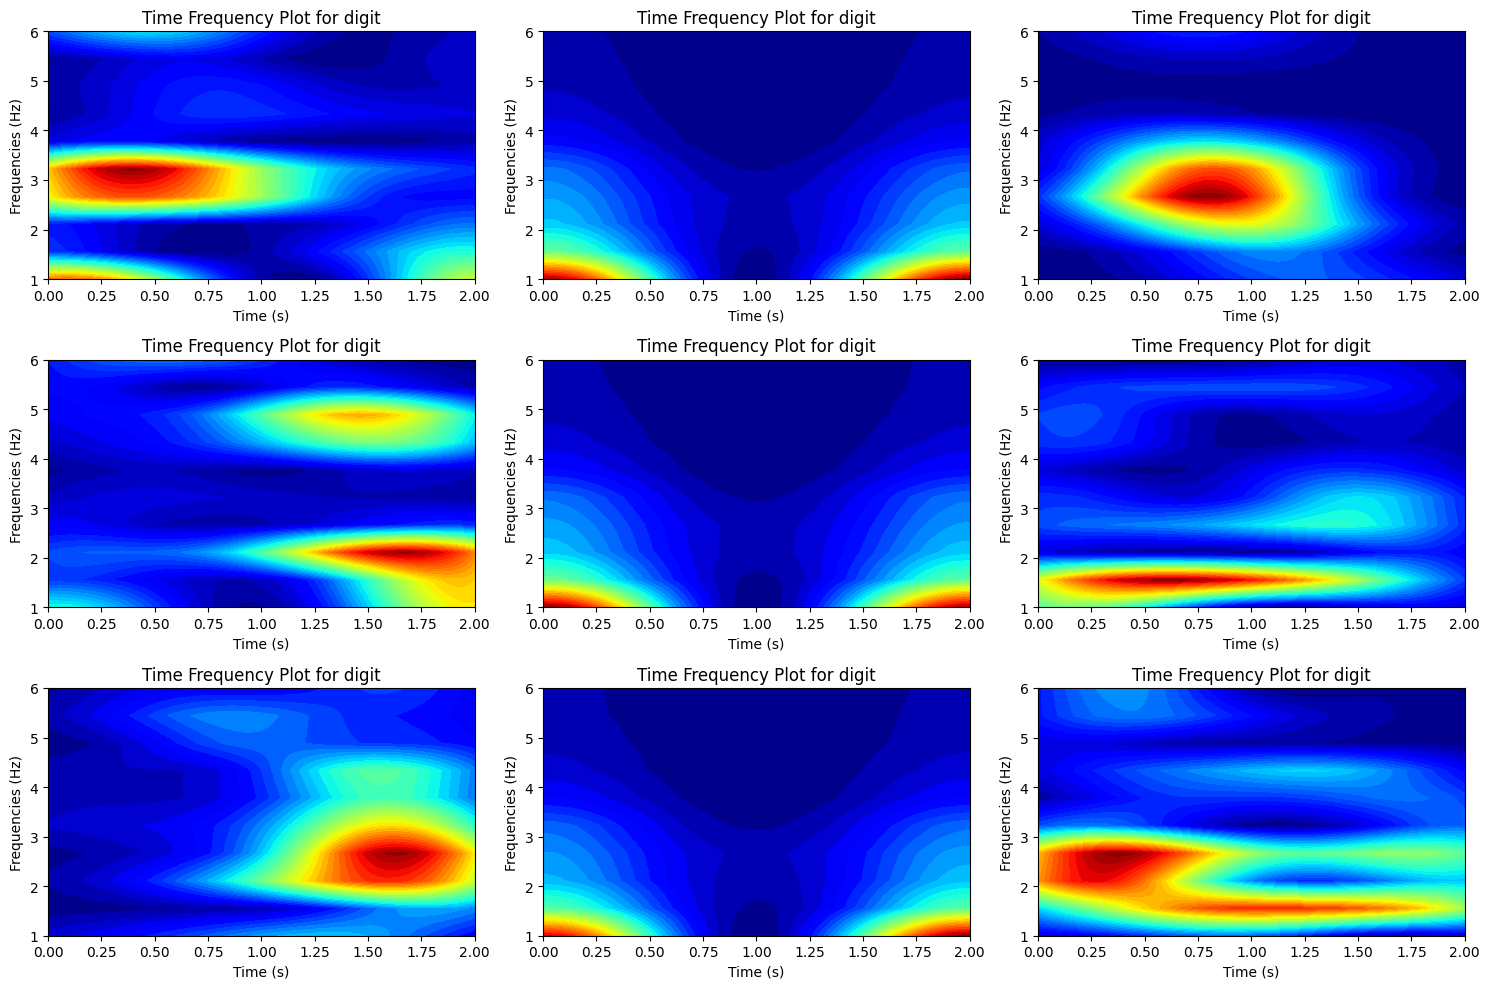

In [39]:
starting_freq = 1
end_freq = 6
num_frequencies = 10

#  Creates an array of time values starting from 0 to 2 seconds, with a total number of elements defined by median_length.
times = np.linspace(0,2,median_length)

nData = data_array.shape[1]
cmwX, nKern, frex = get_cmwX(nData, freqrange=[starting_freq, end_freq], numfrex=num_frequencies)
tf = time_frequency(data_array, cmwX, nKern)

fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i,ax in enumerate(axs.flat):
  x = random.randint(0, tf.shape[0])
  contour = ax.contourf(times, frex, tf[x,:,:], 40, cmap='jet')
  ax.set_xlabel('Time (s)')
  ax.set_ylabel('Frequencies (Hz)')
  ax.set_title(f"Time Frequency Plot for {'non-digit' if codes[x] == -1 else 'digit'}")

fig.tight_layout()